The objective of this notebook is to answer the first objective of this thesis: "Identify temporal, geographical, journal trends of papers citing retractions".

* [Chapter 0 - Libraries and Imports](#chapter0)
* [Chapter 1 - Basic Retraction Statistics](#chapter1)
    * [1.1 - Temporal trends](#section_1_1)
    * [1.2 - Reasons for Retraction](#section_1_2)
    * [1.3 - Geographical Differences](#section_1_3)
    * [1.4 - Analysis per Journal](#section_1_4)
    * [1.5 - Analysis per Scientific area](#section_1_5)
* [Chapter 2 - Citation Statistics](#chapter2)   



<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">

# Chapter 0 - Libraries and Imports <a class="anchor" id="chapter0"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#import dask.dataframe as dd

In [2]:
control_set_import = pd.read_parquet('./retractions_data/control_set.parquet')
retractions_import = pd.read_excel('./retractions_data/processed_data_retractions.xlsx')

In [3]:
control_set = control_set_import.copy()
retractions = retractions_import.copy()

In [4]:
control_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 933634 entries, 0 to 933633
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   authors                                933634 non-null  object        
 1   author_keywords                        539770 non-null  object        
 2   keywords_plus                          873956 non-null  object        
 3   cited_references                       930337 non-null  object        
 4   abstract                               902793 non-null  object        
 5   affiliations                           914940 non-null  object        
 6   doi                                    920195 non-null  object        
 7   eissn                                  722054 non-null  object        
 8   esi_highly_cited_paper                 37361 non-null   object        
 9   esi_hot_paper                          37361 non

In [5]:
retractions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 55 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Record ID                              662 non-null    int64         
 1   Title                                  662 non-null    object        
 2   Subject                                662 non-null    object        
 3   Institution                            662 non-null    object        
 4   Journal                                662 non-null    object        
 5   Publisher                              662 non-null    object        
 6   Country                                662 non-null    object        
 7   Author                                 662 non-null    object        
 8   URLS                                   327 non-null    object        
 9   ArticleType                            662 non-null    object    

In [6]:
retractions['document_type'].value_counts()

document_type
ARTICLE; RETRACTED PUBLICATION                       407
ARTICLE                                              210
ARTICLE; PUBLICATION WITH EXPRESSION OF CONCERN       13
ARTICLE; PROCEEDINGS PAPER; RETRACTED PUBLICATION     12
REVIEW                                                 8
REVIEW; RETRACTED PUBLICATION                          6
ARTICLE; PROCEEDINGS PAPER                             3
ARTICLE; WITHDRAWN PUBLICATION                         3
Name: count, dtype: int64

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">

# Chapter 1 - Basic Retraction Statistics <a class="anchor" id="chapter1"></a>

# 2.5 - Analysis per Scientific area <a class="anchor" id="section_2_5"></a>

In [7]:
control_set.columns

Index(['authors', 'author_keywords', 'keywords_plus', 'cited_references',
       'abstract', 'affiliations', 'doi', 'eissn', 'esi_highly_cited_paper',
       'esi_hot_paper', 'early_access_date', 'funding_agency_and_grant_number',
       'isbn', 'issn', 'iso_source_abv', 'publication_name', 'language',
       'month', 'note', 'cited_reference_count', 'open_access_indicator',
       'organization', 'publisher', 'research_areas', 'researcher_id_numbers',
       'book_series_title', 'wos_core_collection_times_cited_count',
       'document_title', 'document_type', 'wos_categories', 'year_published',
       'authors_affiliations', 'corresponding_author_affiliation',
       'book.group.author', 'publication_date'],
      dtype='object')

In [8]:
areas = control_set[['doi','research_areas']]
areas.loc[:, 'research_areas'] = areas['research_areas'].str.split(';')
areas = areas.explode('research_areas')
areas = areas[areas['research_areas'].str.strip() != ""]
areas['research_areas'] = areas['research_areas'].str.strip()
areas

,doi,research_areas
0,10.0090/geo2021-0173.1,GEOCHEMISTRY \& GEOPHYSICS
1,10.0093/annonc/mdm218,ONCOLOGY
2,10.1002/(SICI)1097-0266(200001)21:1<23::AID-SM...,BUSINESS \& ECONOMICS
3,10.1002/(SICI)1097-0266(200001)21:1<31::AID-SM...,BUSINESS \& ECONOMICS
4,10.1002/(SICI)1097-0266(200001)21:1<51::AID-SM...,BUSINESS \& ECONOMICS
...,...,...
933633,None,BIOPHYSICS
933633,None,BIOTECHNOLOGY \& APPLIED MICROBIOLOGY
933633,None,CHEMISTRY
933633,None,ELECTROCHEMISTRY


In [9]:
areas['research_areas'].value_counts()

research_areas
SCIENCE \& TECHNOLOGY - OTHER TOPICS         157744
CHEMISTRY                                    141119
MATERIALS SCIENCE                            119366
ENGINEERING                                  110566
BIOCHEMISTRY \& MOLECULAR BIOLOGY             83146
                                              ...  
WOMEN'S STUDIES                                  27
ANTHROPOLOGY                                     15
SOCIAL ISSUES                                     7
MEDICAL ETHICS                                    5
OPERATIONS RESEARCH \& MANAGEMENT SCIENCE         1
Name: count, Length: 118, dtype: int64

In [10]:
#pd.DataFrame(areas['research_areas'].unique()).to_excel('./research_areas_wos.xlsx', index=False)

In [11]:
classif_areas = pd.read_excel('./research_areas_wos_classified.xlsx')
classif_areas

,Área científica,Classificação Isabel
0,GEOCHEMISTRY \& GEOPHYSICS,0
1,ONCOLOGY,1
2,BUSINESS \& ECONOMICS,0
3,PHYSICAL GEOGRAPHY,0
4,GEOLOGY,0
...,...,...
113,"DENTISTRY, ORAL SURGERY \& MEDICINE",1
114,WOMEN'S STUDIES,0
115,SPECTROSCOPY,1
116,MARINE \& FRESHWATER BIOLOGY,0


In [12]:
areas = areas.merge(classif_areas, how= 'left', left_on = 'research_areas', right_on = 'Área científica')
areas

,doi,research_areas,Área científica,Classificação Isabel
0,10.0090/geo2021-0173.1,GEOCHEMISTRY \& GEOPHYSICS,GEOCHEMISTRY \& GEOPHYSICS,0
1,10.0093/annonc/mdm218,ONCOLOGY,ONCOLOGY,1
2,10.1002/(SICI)1097-0266(200001)21:1<23::AID-SM...,BUSINESS \& ECONOMICS,BUSINESS \& ECONOMICS,0
3,10.1002/(SICI)1097-0266(200001)21:1<31::AID-SM...,BUSINESS \& ECONOMICS,BUSINESS \& ECONOMICS,0
4,10.1002/(SICI)1097-0266(200001)21:1<51::AID-SM...,BUSINESS \& ECONOMICS,BUSINESS \& ECONOMICS,0
...,...,...,...,...
1665598,None,BIOPHYSICS,BIOPHYSICS,0
1665599,None,BIOTECHNOLOGY \& APPLIED MICROBIOLOGY,BIOTECHNOLOGY \& APPLIED MICROBIOLOGY,2
1665600,None,CHEMISTRY,CHEMISTRY,0
1665601,None,ELECTROCHEMISTRY,ELECTROCHEMISTRY,0


In [13]:
areas['Biomedicine'] = np.where(areas['Classificação Isabel'] >= 1, 1, 0)

In [14]:
areas

,doi,research_areas,Área científica,Classificação Isabel,Biomedicine
0,10.0090/geo2021-0173.1,GEOCHEMISTRY \& GEOPHYSICS,GEOCHEMISTRY \& GEOPHYSICS,0,0
1,10.0093/annonc/mdm218,ONCOLOGY,ONCOLOGY,1,1
2,10.1002/(SICI)1097-0266(200001)21:1<23::AID-SM...,BUSINESS \& ECONOMICS,BUSINESS \& ECONOMICS,0,0
3,10.1002/(SICI)1097-0266(200001)21:1<31::AID-SM...,BUSINESS \& ECONOMICS,BUSINESS \& ECONOMICS,0,0
4,10.1002/(SICI)1097-0266(200001)21:1<51::AID-SM...,BUSINESS \& ECONOMICS,BUSINESS \& ECONOMICS,0,0
...,...,...,...,...,...
1665598,None,BIOPHYSICS,BIOPHYSICS,0,0
1665599,None,BIOTECHNOLOGY \& APPLIED MICROBIOLOGY,BIOTECHNOLOGY \& APPLIED MICROBIOLOGY,2,1
1665600,None,CHEMISTRY,CHEMISTRY,0,0
1665601,None,ELECTROCHEMISTRY,ELECTROCHEMISTRY,0,0


In [15]:
control_set = control_set.merge(areas.groupby('doi')['Biomedicine'].sum(), how='left', on = 'doi')

In [16]:
control_set['Biomedicine'] = np.where(control_set['Biomedicine']>=1, 1, 0)

In [17]:
pd.DataFrame(areas['research_areas'].unique())

,0
0,GEOCHEMISTRY \& GEOPHYSICS
1,ONCOLOGY
2,BUSINESS \& ECONOMICS
3,PHYSICAL GEOGRAPHY
4,GEOLOGY
...,...
113,"DENTISTRY, ORAL SURGERY \& MEDICINE"
114,WOMEN'S STUDIES
115,SPECTROSCOPY
116,MARINE \& FRESHWATER BIOLOGY


In [18]:
subject = retractions[['Record ID','research_areas']]
subject.loc[:, 'research_areas'] = subject['research_areas'].str.split(';')
subject = subject.explode('research_areas')
subject = subject[subject['research_areas'].str.strip() != ""]
subject['research_areas'] = subject['research_areas'].str.strip()
subject

,Record ID,research_areas
0,19131,CHEMISTRY
0,19131,SCIENCE \& TECHNOLOGY - OTHER TOPICS
0,19131,MATERIALS SCIENCE
0,19131,PHYSICS
1,5767,CHEMISTRY
...,...,...
659,8591,"PUBLIC, ENVIRONMENTAL \& OCCUPATIONAL HEALTH"
660,13650,ORTHOPEDICS
661,4261,CELL BIOLOGY
661,4261,HEMATOLOGY


In [19]:
subject['research_areas'].value_counts()#[:30]

research_areas
SCIENCE \& TECHNOLOGY - OTHER TOPICS            198
BIOCHEMISTRY \& MOLECULAR BIOLOGY               148
CELL BIOLOGY                                    130
ONCOLOGY                                         96
MATERIALS SCIENCE                                56
CHEMISTRY                                        51
ENGINEERING                                      42
ENDOCRINOLOGY \& METABOLISM                      26
OBSTETRICS \& GYNECOLOGY                         24
ENVIRONMENTAL SCIENCES \& ECOLOGY                23
GENETICS \& HEREDITY                             20
GENERAL \& INTERNAL MEDICINE                     20
PHYSICS                                          19
IMMUNOLOGY                                       19
METALLURGY \& METALLURGICAL ENGINEERING          18
REPRODUCTIVE BIOLOGY                             17
BIOTECHNOLOGY \& APPLIED MICROBIOLOGY            14
ENERGY \& FUELS                                  13
RESEARCH \& EXPERIMENTAL MEDICINE                

In [20]:
subject = subject.merge(classif_areas, how= 'left', left_on = 'research_areas', right_on = 'Área científica')
subject['Biomedicine'] = np.where(subject['Classificação Isabel'] >= 1, 1, 0)

In [21]:
subject

,Record ID,research_areas,Área científica,Classificação Isabel,Biomedicine
0,19131,CHEMISTRY,CHEMISTRY,0,0
1,19131,SCIENCE \& TECHNOLOGY - OTHER TOPICS,SCIENCE \& TECHNOLOGY - OTHER TOPICS,0,0
2,19131,MATERIALS SCIENCE,MATERIALS SCIENCE,0,0
3,19131,PHYSICS,PHYSICS,0,0
4,5767,CHEMISTRY,CHEMISTRY,0,0
...,...,...,...,...,...
1105,8591,"PUBLIC, ENVIRONMENTAL \& OCCUPATIONAL HEALTH","PUBLIC, ENVIRONMENTAL \& OCCUPATIONAL HEALTH",0,0
1106,13650,ORTHOPEDICS,ORTHOPEDICS,1,1
1107,4261,CELL BIOLOGY,CELL BIOLOGY,2,1
1108,4261,HEMATOLOGY,HEMATOLOGY,1,1


In [22]:
subject.groupby('Record ID')['Biomedicine'].sum().value_counts()

Biomedicine
0    301
1    173
2    159
4     16
3     13
Name: count, dtype: int64

In [23]:
retractions = retractions.merge(subject.groupby('Record ID')['Biomedicine'].sum(), how='left', on = 'Record ID')

In [24]:
retractions['Biomedicine'] = np.where(retractions['Biomedicine']>=1, 1, 0)

In [25]:
retractions['Biomedicine'].value_counts()

Biomedicine
1    361
0    301
Name: count, dtype: int64

In [26]:
retractions_grouped = retractions[retractions['RetractionDate'].dt.year != 2023].groupby(retractions['RetractionDate'].dt.year)['Record ID'].count().reset_index(name= 'Nr of Retractions')
control_set_grouped = control_set.groupby('year_published').size().reset_index(name= 'Nr of Articles')

# Merge the two grouped DataFrames on the 'year_published' column
year_counts = pd.merge(retractions_grouped, control_set_grouped, how='outer', left_on='RetractionDate', right_on='year_published').drop('year_published', axis=1)

In [27]:
number_of_biomed_retracted = retractions[retractions['RetractionDate'].dt.year != 2023].groupby(retractions['RetractionDate'].dt.year)['Biomedicine'].sum().reset_index(name= 'Nr of Retractions in Biomedicine')
number_of_biomed_total = control_set[control_set['year_published'] != 2023].groupby(control_set['year_published'])['Biomedicine'].sum().reset_index(name= 'Nr of Articles in Biomedicine')

In [28]:
number_of_non_biomed_retracted = retractions[retractions['RetractionDate'].dt.year != 2023].groupby(retractions['RetractionDate'].dt.year)['Biomedicine'].apply(lambda x: (x == 0).sum()).reset_index(name='Nr of Retractions not in Biomedicine')
number_of_non_biomed_total = control_set[control_set['year_published'] != 2023].groupby(control_set['year_published'])['Biomedicine'].apply(lambda x: (x == 0).sum()).reset_index(name='Nr of Articles not in Biomedicine')

In [29]:
year_counts = pd.merge(year_counts, number_of_biomed_retracted, how='left', on='RetractionDate')
year_counts = pd.merge(year_counts, number_of_non_biomed_retracted, how='left', on='RetractionDate')
year_counts = pd.merge(year_counts, number_of_biomed_total, how='left', left_on='RetractionDate', right_on='year_published')
year_counts = pd.merge(year_counts, number_of_non_biomed_total, how='left', left_on='RetractionDate', right_on='year_published')

In [30]:
year_counts.drop(['year_published_x', 'year_published_y'], axis = 1, inplace= True)

In [31]:
year_counts

,RetractionDate,Nr of Retractions,Nr of Articles,Nr of Retractions in Biomedicine,Nr of Retractions not in Biomedicine,Nr of Articles in Biomedicine,Nr of Articles not in Biomedicine
0,2000,2,23493,1,1,11144,12349
1,2001,1,23693,1,0,11803,11890
2,2002,15,24712,1,14,12722,11990
3,2003,15,26277,3,12,14072,12205
4,2004,10,26961,6,4,13992,12969
5,2005,15,28147,8,7,14873,13274
6,2006,26,29677,14,12,15048,14629
7,2007,15,31284,9,6,15794,15490
8,2008,13,32277,7,6,15366,16911
9,2009,17,33739,8,9,15871,17868


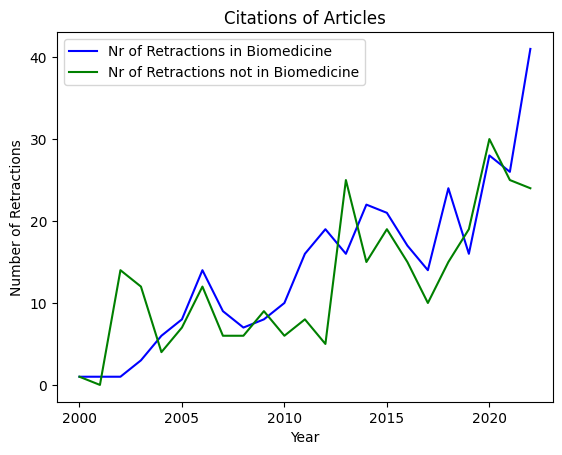

In [32]:
plt.plot(year_counts['RetractionDate'], year_counts['Nr of Retractions in Biomedicine'], label = "Nr of Retractions in Biomedicine", color="b")
plt.plot(year_counts['RetractionDate'], year_counts['Nr of Retractions not in Biomedicine'], label = "Nr of Retractions not in Biomedicine", color="g")

plt.xlabel('Year')
plt.ylabel('Number of Retractions')
plt.title('Citations of Articles')
plt.legend()
plt.show()

In [33]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'result' is your merged Dask DataFrame

# Create subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Biomedicine", "Other Scientific Areas"), specs=[[{"secondary_y": True}, {"secondary_y": True}]])

# Add traces for Biomedicine subplot
fig.add_trace(go.Scatter(x=year_counts['RetractionDate'], y=year_counts['Nr of Articles in Biomedicine'],
                         mode='lines', name='Nr of Articles in Biomedicine'), row=1, col=1, secondary_y=False)
fig.add_trace(go.Scatter(x=year_counts['RetractionDate'], y=year_counts['Nr of Retractions in Biomedicine'],
                         mode='lines', name='Nr of Retractions in Biomedicine'), row=1, col=1, secondary_y=True)

# Add traces for Other Scientific Areas subplot
fig.add_trace(go.Scatter(x=year_counts['RetractionDate'], y=year_counts['Nr of Articles not in Biomedicine'],
                         mode='lines', name='Nr of Articles not in Biomedicine'), row=1, col=2, secondary_y=False)
fig.add_trace(go.Scatter(x=year_counts['RetractionDate'], y=year_counts['Nr of Retractions not in Biomedicine'],
                         mode='lines', name='Nr of Retractions not in Biomedicine'), row=1, col=2, secondary_y=True)

# Update axes labels and titles
fig.update_xaxes(title_text="Year", row=1, col=1)
fig.update_xaxes(title_text="Year", row=1, col=2)

fig.update_yaxes(title_text="Number of Articles", row=1, col=1, secondary_y=False)
fig.update_yaxes(title_text="Number of Retractions", row=1, col=1, secondary_y=True)
fig.update_yaxes(title_text="Number of Articles", row=1, col=2, secondary_y=False)
fig.update_yaxes(title_text="Number of Retractions", row=1, col=2, secondary_y=True)

# Update layout
fig.update_layout(title_text="Number of Articles and Retractions",
                  legend=dict(x=0.01, y=1))

# Show plot
fig.show()




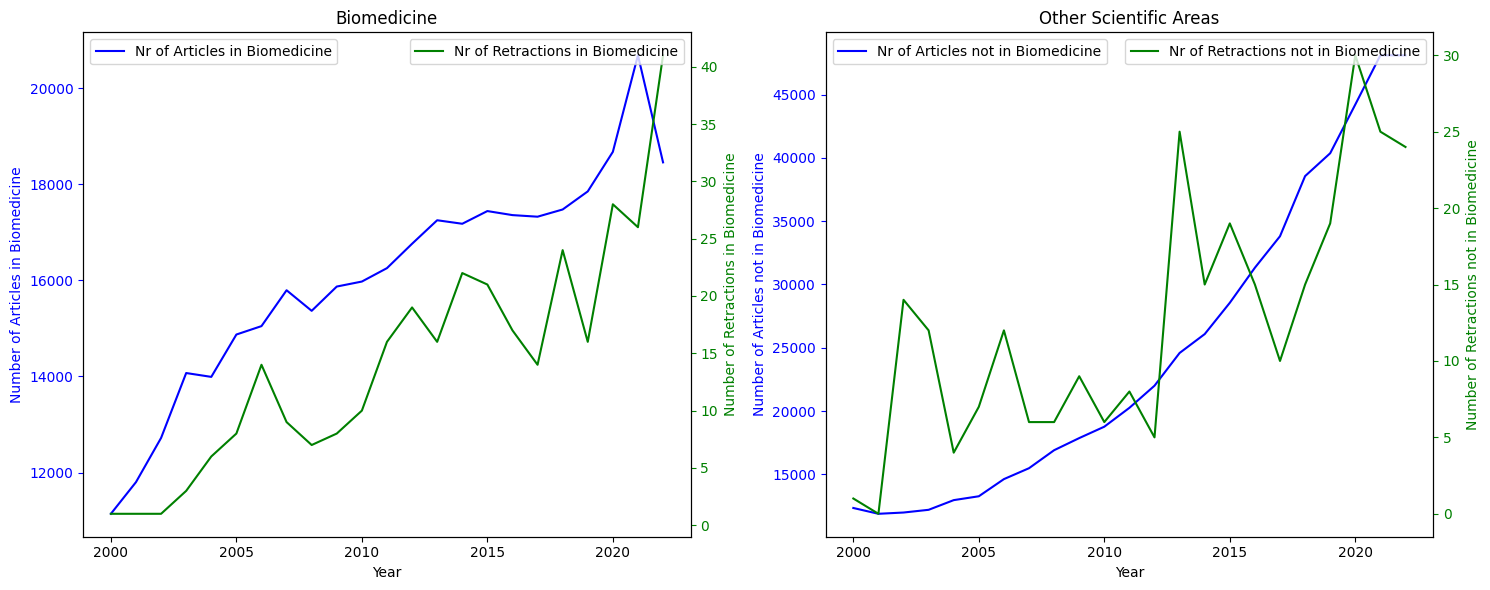

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'result' is your merged Dask DataFrame
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Plot the number of articles on the primary y-axis for the first subplot
axes[0].plot(year_counts['RetractionDate'], year_counts['Nr of Articles in Biomedicine'], color='blue', label='Nr of Articles in Biomedicine')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Articles in Biomedicine', color='blue')
axes[0].tick_params('y', colors='blue')
axes[0].set_title('Biomedicine')

# Create a twin Axes sharing the xaxis for the first subplot
axes2 = axes[0].twinx()

# Plot the number of retractions on the secondary y-axis for the first subplot
axes2.plot(year_counts['RetractionDate'], year_counts['Nr of Retractions in Biomedicine'], color='green', label='Nr of Retractions in Biomedicine')
axes2.set_ylabel('Number of Retractions in Biomedicine', color='green')
axes2.tick_params('y', colors='green')

# Add legend for the first subplot
axes[0].legend(loc='upper left')
axes2.legend(loc='upper right')

# Plot the same data on the second subplot
axes[1].plot(year_counts['RetractionDate'], year_counts['Nr of Articles not in Biomedicine'], color='blue', label='Nr of Articles not in Biomedicine')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Number of Articles not in Biomedicine', color='blue')
axes[1].tick_params('y', colors='blue')
axes[1].set_title('Other Scientific Areas')

# Create a twin Axes sharing the xaxis for the second subplot
axes2_2 = axes[1].twinx()

# Plot the number of retractions on the secondary y-axis for the second subplot
axes2_2.plot(year_counts['RetractionDate'], year_counts['Nr of Retractions not in Biomedicine'], color='green', label='Nr of Retractions not in Biomedicine')
axes2_2.set_ylabel('Number of Retractions not in Biomedicine', color='green')
axes2_2.tick_params('y', colors='green')

# Add legend for the second subplot
axes[1].legend(loc='upper left')
axes2_2.legend(loc='upper right')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()



In [35]:
#subject['Subject'].value_counts().to_excel('../subject_retractions.xlsx')

In [36]:
retractions

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,wos_core_collection_times_cited_count,document_title,document_type,wos_categories,year_published,authors_affiliations,corresponding_author_affiliation,book.group.author,publication_date,Biomedicine
0,19131,Guiding Cell Migration Using One-Way Micropatt...,(BLS) Biochemistry;(BLS) Biology - Cellular;,"Chemical & Materials Engineering Department, U...",Advanced Materials,Wiley,United States,Girish Kumar;Chia Chi Ho;Carlos C Co,NaN,Research Article;,...,87,guiding cell migration using one-way micropatt...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2007,UNIV CINCINNATI;UNIV CINCINNATI,UNIV CINCINNATI,NaN,2007-04-20,0
1,5767,Self-Assembled Si Quantum-Ring Structures on a...,(PHY) Materials Science;(PHY) Nanotechnology;,National Laboratory of Solid State Microstruct...,Advanced Materials,Wiley,China,Lin Wei Yu;Kun Ji Chen;Jie Song;Jun Xu;Wei Li;...,NaN,Research Article;,...,10,self-assembled si quantum-ring structures on a...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2007,NANJING UNIV;NANJING UNIV,NANJING UNIV,NaN,2007-06-18,0
2,5650,High-volumetric performance aligned nano-porou...,(PHY) Engineering - Chemical;(PHY) Engineering...,Department of Materials Science and Engineerin...,Advanced Materials,Wiley,China;United States,Mehdi Ghaffari;Yue Zhou;Haiping Xu;Minren Lin;...,http://retractionwatch.com/2016/10/28/material...,Research Article;,...,103,high-volumetric performance aligned nano-porou...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2013,PENN STATE UNIV;PENN STATE UNIV;PENN STATE UNI...,PENN STATE UNIV,NaN,2013-09-20,0
3,6221,Aligned Nano-Porous Microwave Exfoliated Graph...,(PHY) Engineering - Chemical;(PHY) Engineering...,Department of Materials Science and Engineerin...,Advanced Materials,Wiley,United States,Mehdi Ghaffari;QM Zhang;W Kinsman;Yue Zhou;Sha...,http://retractionwatch.com/2016/10/28/material...,Research Article;,...,11,aligned nano-porous microwave exfoliated graph...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2013,PENN STATE UNIV;PENN STATE UNIV;PENN STATE UNI...,PENN STATE UNIV,NaN,2013-11-20,0
4,45124,Highly Sensitive MoS2 Humidity Sensors Array f...,(PHY) Engineering - Chemical;,Beijing National Laboratory for Condensed Matt...,Advanced Materials,Wiley,China,Jing Zhao;Na Li;Zheng Wei;Mengzhou Liao;Peng C...,NaN,Research Article;,...,349,highly sensitive mos<sub>2</sub> humidity sens...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2017,INST PHYS;BEJING INST NANOENRGY AND NANOSYST;U...,INST PHYS,NaN,2017-09-13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,38203,NEK2 plays an active role in Tumorigenesis and...,(BLS) Biochemistry;(BLS) Biology - Cancer;(BLS...,"Department of Radiation and Medical Oncology, ...",International Journal of Biological Sciences,Ivyspring International Publisher,China,Rui Bai;Cheng Yuan;Wenjie Sun;Jianguo Zhang;Yu...,NaN,Research Article;,...,10,nek2 plays an active role in tumorigenesis and...,ARTICLE; RETRACTED PUBLICATION,BIOCHEMISTRY \& MOLECULAR BIOLOGY; BIOLOGY,2021,WUHAN UNIV;WUHAN UNIV;WUHAN UNIV;WUHAN UNIV;WU...,WUHAN UNIV,NaN,2021-01-01,1
658,34229,Andrographolide Suppress Tumor Growth by Inhib...,(BLS) Biology - Cancer;(BLS) Biology - Cellula...,"Vascular Biology Research Institute, Guangdong...",International Journal of Biological Sciences,IOS Publishing (Institute of Science Publishing),China,Qian Qian Zhang;Yi Ding;Yan Lei;Cui Ling Qi;Xi...,NaN,Research Article;,...,42,andrographolide suppress tumor growth by inhib...,ARTICLE; RETRACTED PUBLICATION,BIOCHEMISTRY \& MOLECULAR BIOLOGY; BIOLOGY,2014,GUANGDONG PHARMACEUT UNIV;GUANGDONG PHARMACEUT...,GUANGDONG PHARMACEUT UNIV,NaN,2014-01-01,1
659,8591,CD117 immunohistochemical expression correl

In [37]:
motives = retractions[['Record ID','Reason', 'Biomedicine']]
motives.loc[:, 'Reason'] = motives['Reason'].str.split(';')
motives = motives.explode('Reason')
motives.loc[:, 'Reason'] = motives['Reason'].str.replace('+', '')
motives = motives[motives['Reason'].str.strip() != ""]
motives


,Record ID,Reason,Biomedicine
0,19131,Concerns/Issues About Data,0
0,19131,Concerns/Issues About Image,0
0,19131,Investigation by Company/Institution,0
1,5767,Duplication of Data,0
1,5767,Ethical Violations by Author,0
...,...,...,...
661,4261,Investigation by ORI,1
661,4261,Misconduct - Official Investigation/Finding,1
661,4261,Misconduct by Author,1
661,4261,Notice - Limited or No Information,1


In [38]:
top10_reasons_biomed = motives['Reason'].value_counts()[:10].reset_index(name = "Biomed")
top10_reasons_biomed

,Reason,Biomed
0,Investigation by Company/Institution,168
1,Unreliable Results,116
2,Duplication of Image,108
3,Misconduct by Author,105
4,Concerns/Issues About Data,100
5,Error in Data,90
6,Misconduct - Official Investigation/Finding,88
7,Falsification/Fabrication of Data,82
8,Manipulation of Images,76
9,Results Not Reproducible,75


In [39]:
top10_reasons_non_biomed = motives[motives['Biomedicine']==1]['Reason'].value_counts()[:10].reset_index(name = "Non Biomed")
top10_reasons_non_biomed

,Reason,Non Biomed
0,Investigation by Company/Institution,98
1,Duplication of Image,88
2,Manipulation of Images,58
3,Concerns/Issues About Data,55
4,Misconduct by Author,53
5,Error in Data,52
6,Unreliable Results,46
7,Falsification/Fabrication of Data,44
8,Investigation by Journal/Publisher,41
9,Misconduct - Official Investigation/Finding,41


In [40]:
top10_reasons = pd.concat([top10_reasons_biomed, top10_reasons_non_biomed], axis=1)
top10_reasons

,Reason,Biomed,Reason,Non Biomed
0,Investigation by Company/Institution,168,Investigation by Company/Institution,98
1,Unreliable Results,116,Duplication of Image,88
2,Duplication of Image,108,Manipulation of Images,58
3,Misconduct by Author,105,Concerns/Issues About Data,55
4,Concerns/Issues About Data,100,Misconduct by Author,53
5,Error in Data,90,Error in Data,52
6,Misconduct - Official Investigation/Finding,88,Unreliable Results,46
7,Falsification/Fabrication of Data,82,Falsification/Fabrication of Data,44
8,Manipulation of Images,76,Investigation by Journal/Publisher,41
9,Results Not Reproducible,75,Misconduct - Official Investigation/Finding,41


In [41]:
top10_reasons.to_excel('./top10_reasons_biomed.xlsx', index=False)

- Reasons for retraction by year
- % of articles for fraud or suspected fraud by Year of Retraction
- nº of articles in total and nº of articles

Mean and median number of citations for control set and retractions by year. 

In [42]:
control_set['cited_reference_count'].describe()

count     933634.0
mean     52.838426
std      54.898892
min            0.0
25%           29.0
50%           42.0
75%           59.0
max         4723.0
Name: cited_reference_count, dtype: Float64

In [43]:
retractions['cited_reference_count'].describe()

count    662.000000
mean      42.450151
std       31.596402
min        7.000000
25%       28.000000
50%       37.000000
75%       50.000000
max      523.000000
Name: cited_reference_count, dtype: float64

In [44]:
keywords = ["duplication of article"]
retractions[retractions['Reason'].str.lower().str.contains('|'.join(keywords))][['OriginalPaperDOI', 'doi', 'Reason']]

,OriginalPaperDOI,doi,Reason
38,10.1016/S0261-3069(02)00086-9,10.1016/S0261-3069(02)00086-9,+Duplication of Article;
49,10.1016/j.actbio.2010.02.010,10.1016/j.actbio.2010.02.010,+Duplication of Article;+Falsification/Fabrica...
56,10.1016/j.actbio.2014.12.010,10.1016/j.actbio.2014.12.010,+Duplication of Article;
60,10.1016/j.agrformet.2019.107713,10.1016/j.agrformet.2019.107713,+Duplication of Article;
65,10.1016/j.bios.2007.01.003,10.1016/j.bios.2007.01.003,+Duplication of Article;
115,10.1016/j.diabres.2003.10.029,10.1016/j.diabres.2003.10.029,+Duplication of Article;+Euphemisms for Duplic...
116,10.1016/j.diabres.2007.01.069,10.1016/j.diabres.2007.01.069,+Duplication of Article;+Lack of Approval from...
118,10.1016/j.enbuild.2010.12.006,10.1016/j.enbuild.2010.12.006,+Date of Retraction/Other Unknown;+Duplication...
119,10.1016/j.enbuild.2010.12.025,10.1016/j.enbuild.2010.12.025,+Date of Retraction/Other Unknown;+Duplication...
120,10.1016/j.enbuild.2011.02.018,10.1016/j.enbuild.2011.02.018,+Date of Retraction/Other Unknown;+Duplication...


# 1.1 - Temporal trends <a class="anchor" id="section_1_1"></a>

In [45]:
retractions_grouped = retractions[retractions['RetractionDate'].dt.year != 2023].groupby(retractions['RetractionDate'].dt.year)['Record ID'].count().reset_index(name= 'Nr of Retractions')
control_set_grouped = control_set.groupby('year_published').size().reset_index(name= 'Nr of Articles')

# Merge the two grouped DataFrames on the 'year_published' column
year_counts = pd.merge(retractions_grouped, control_set_grouped, how='outer', left_on='RetractionDate', right_on='year_published').drop('year_published', axis=1)

In [46]:
year_counts['Proportion of Retractions'] = ((year_counts['Nr of Retractions'] / year_counts['Nr of Articles']) * 10000)

In [47]:
year_counts

,RetractionDate,Nr of Retractions,Nr of Articles,Proportion of Retractions
0,2000,2,23493,0.851317
1,2001,1,23693,0.422066
2,2002,15,24712,6.069926
3,2003,15,26277,5.708414
4,2004,10,26961,3.709061
5,2005,15,28147,5.329165
6,2006,26,29677,8.760993
7,2007,15,31284,4.794783
8,2008,13,32277,4.027636
9,2009,17,33739,5.038679


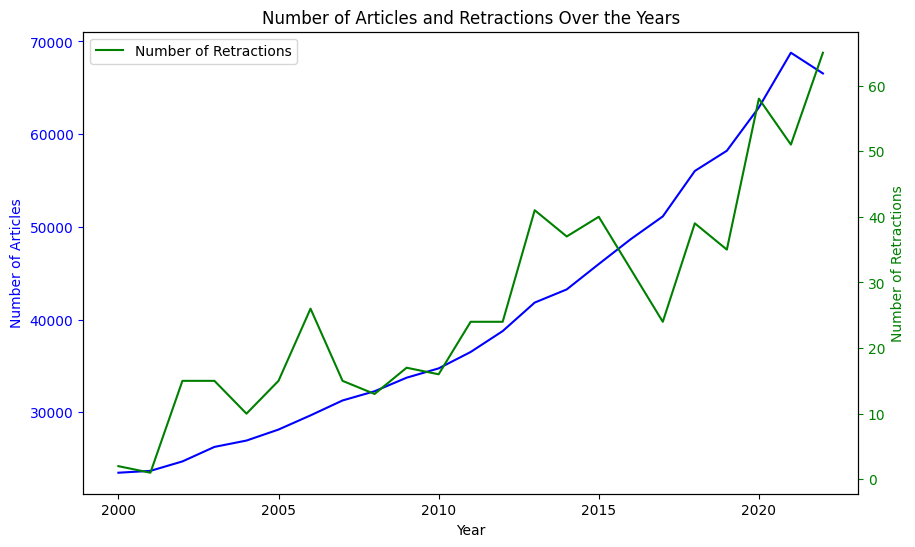

In [48]:
# Assuming 'result' is your merged Dask DataFrame
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of articles on the primary y-axis
ax1.plot(year_counts['RetractionDate'], year_counts['Nr of Articles'], color='blue', label='Number of Articles')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Articles', color='blue')
ax1.tick_params('y', colors='blue')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plot the number of retractions on the secondary y-axis
ax2.plot(year_counts['RetractionDate'], year_counts['Nr of Retractions'], color='green', label='Number of Retractions')
ax2.set_ylabel('Number of Retractions', color='green')
ax2.tick_params('y', colors='green')

# Add title and legend
plt.title('Number of Articles and Retractions Over the Years')
plt.legend()

# Show the plot
plt.show()


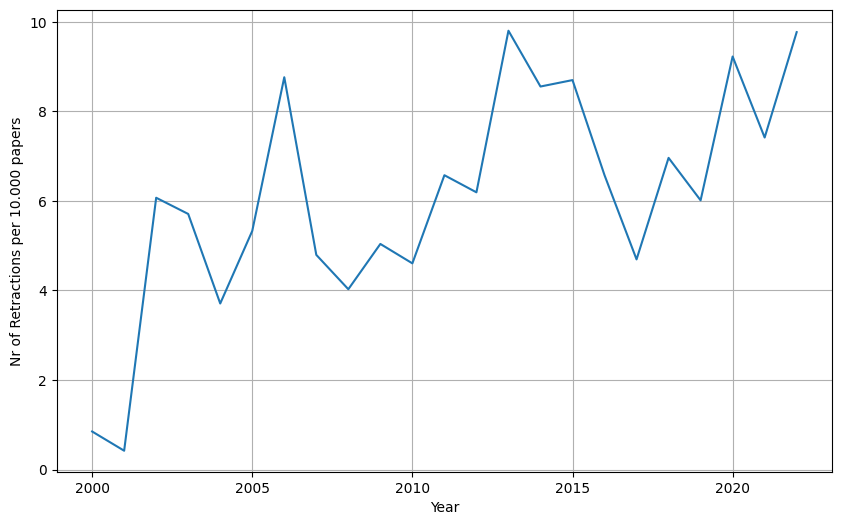

In [49]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(year_counts['RetractionDate'], year_counts['Proportion of Retractions'])

plt.xlabel('Year')
plt.ylabel('Nr of Retractions per 10.000 papers')
#plt.title('Evolution of number of retractions')
plt.grid(True)
plt.show()

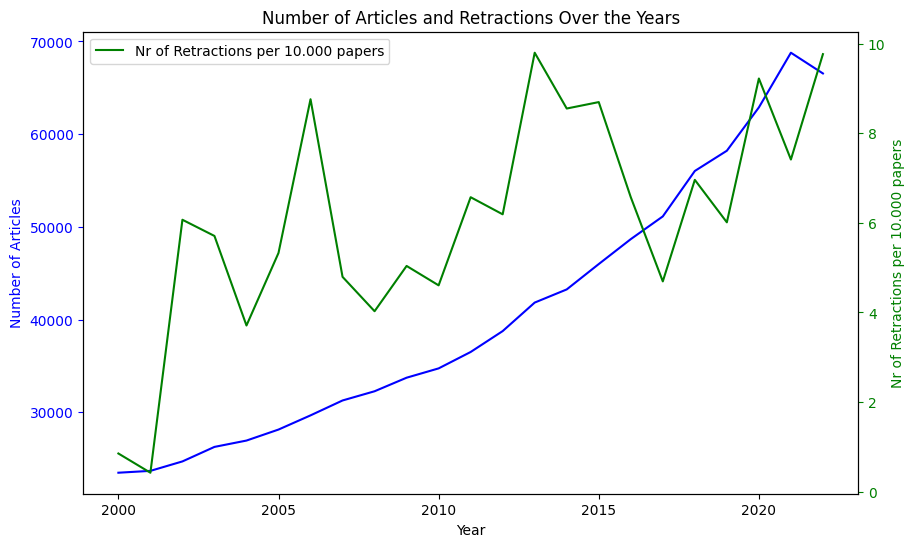

In [50]:
# Assuming 'result' is your merged Dask DataFrame
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of articles on the primary y-axis
ax1.plot(year_counts['RetractionDate'], year_counts['Nr of Articles'], color='blue', label='Number of Articles')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Articles', color='blue')
ax1.tick_params('y', colors='blue')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plot the number of retractions on the secondary y-axis
ax2.plot(year_counts['RetractionDate'], year_counts['Proportion of Retractions'], color='green', label='Nr of Retractions per 10.000 papers')
ax2.set_ylabel('Nr of Retractions per 10.000 papers', color='green')
ax2.tick_params('y', colors='green')

# Add title and legend
plt.title('Number of Articles and Retractions Over the Years')
plt.legend()

# Show the plot
plt.show()


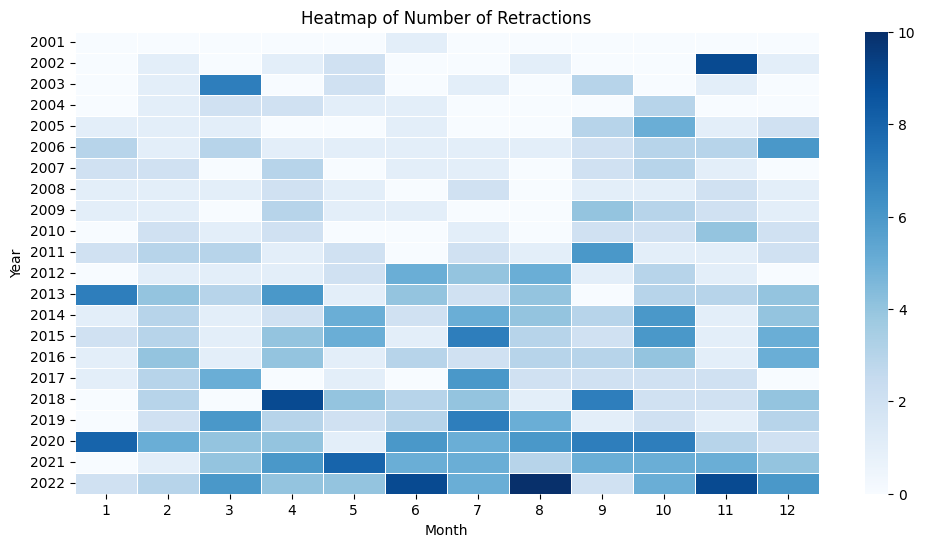

In [51]:
heatmap_data = retractions[(retractions['RetractionDate'].dt.year != 2023) & (retractions['RetractionDate'].dt.year >2000)].copy()
heatmap_data['year'] = heatmap_data['RetractionDate'].dt.year
heatmap_data['month'] = heatmap_data['RetractionDate'].dt.month

heatmap_data = heatmap_data.pivot_table(index='year', columns='month', values='Record ID', aggfunc=pd.Series.nunique, fill_value=0)

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot= False, fmt='d', cmap='Blues', linewidths=0.5)
plt.title('Heatmap of Number of Retractions')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [52]:
#average number of days until retraction
np.mean(retractions['RetractionDate']-retractions['OriginalPaperDate'])

Timedelta('1547 days 20:46:24.290030208')

In [53]:
control_set.columns

Index(['authors', 'author_keywords', 'keywords_plus', 'cited_references',
       'abstract', 'affiliations', 'doi', 'eissn', 'esi_highly_cited_paper',
       'esi_hot_paper', 'early_access_date', 'funding_agency_and_grant_number',
       'isbn', 'issn', 'iso_source_abv', 'publication_name', 'language',
       'month', 'note', 'cited_reference_count', 'open_access_indicator',
       'organization', 'publisher', 'research_areas', 'researcher_id_numbers',
       'book_series_title', 'wos_core_collection_times_cited_count',
       'document_title', 'document_type', 'wos_categories', 'year_published',
       'authors_affiliations', 'corresponding_author_affiliation',
       'book.group.author', 'publication_date', 'Biomedicine'],
      dtype='object')

In [54]:
retractions.columns

Index(['Record ID', 'Title', 'Subject', 'Institution', 'Journal', 'Publisher',
       'Country', 'Author', 'URLS', 'ArticleType', 'RetractionDate',
       'RetractionDOI', 'RetractionPubMedID', 'OriginalPaperDate',
       'OriginalPaperDOI', 'OriginalPaperPubMedID', 'RetractionNature',
       'Reason', 'Paywalled', 'Notes', 'authors', 'author_keywords',
       'keywords_plus', 'cited_references', 'abstract', 'affiliations', 'doi',
       'eissn', 'esi_highly_cited_paper', 'esi_hot_paper', 'early_access_date',
       'funding_agency_and_grant_number', 'isbn', 'issn', 'iso_source_abv',
       'publication_name', 'language', 'month', 'note',
       'cited_reference_count', 'open_access_indicator', 'organization',
       'publisher', 'research_areas', 'researcher_id_numbers',
       'book_series_title', 'wos_core_collection_times_cited_count',
       'document_title', 'document_type', 'wos_categories', 'year_published',
       'authors_affiliations', 'corresponding_author_affiliation',
   

In [55]:
retractions_grouped = retractions[retractions['RetractionDate'].dt.year != 2023].groupby(retractions['RetractionDate'].dt.year)['cited_reference_count'].mean().reset_index(name= 'Avg Citations of Retractions')
control_set_grouped = control_set.groupby('year_published')['cited_reference_count'].mean().reset_index(name= 'Avg Citations of Articles')

# Merge the two grouped DataFrames on the 'year_published' column
year_avg_citations = pd.merge(retractions_grouped, control_set_grouped, how='outer', left_on='RetractionDate', right_on='year_published').drop('year_published', axis=1)

In [56]:
year_avg_citations

,RetractionDate,Avg Citations of Retractions,Avg Citations of Articles
0,2000,34.500000,36.325416
1,2001,26.000000,36.989659
2,2002,24.600000,38.104888
3,2003,27.400000,38.529436
4,2004,36.700000,40.06094
5,2005,38.933333,40.574271
6,2006,33.500000,41.248206
7,2007,31.066667,42.720017
8,2008,34.769231,44.141804
9,2009,32.470588,45.921041


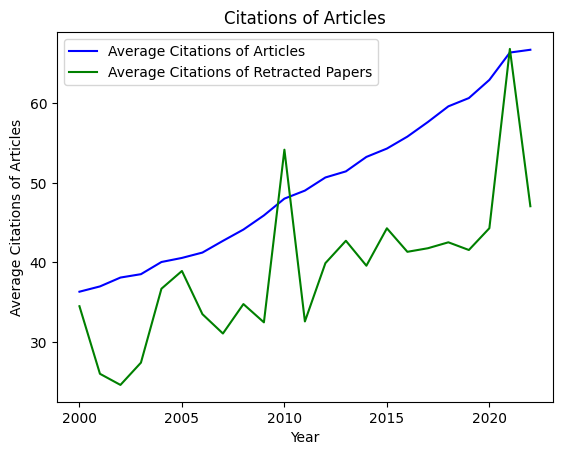

In [57]:
plt.plot(year_avg_citations['RetractionDate'], year_avg_citations['Avg Citations of Articles'], label = "Average Citations of Articles", color="b")
plt.plot(year_avg_citations['RetractionDate'], year_avg_citations['Avg Citations of Retractions'], label = "Average Citations of Retracted Papers", color="g")

plt.xlabel('Year')
plt.ylabel('Average Citations of Articles')
plt.title('Citations of Articles')
plt.legend()
plt.show()

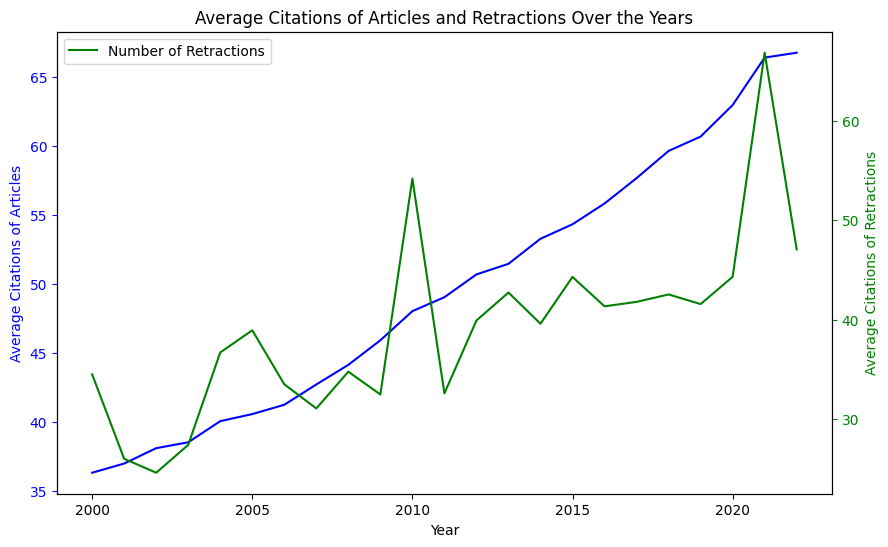

In [58]:
# Assuming 'result' is your merged Dask DataFrame
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the number of articles on the primary y-axis
ax1.plot(year_avg_citations['RetractionDate'], year_avg_citations['Avg Citations of Articles'], color='blue', label='Number of Articles')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Citations of Articles', color='blue')
ax1.tick_params('y', colors='blue')

# Create a twin Axes sharing the xaxis
ax2 = ax1.twinx()

# Plot the number of retractions on the secondary y-axis
ax2.plot(year_avg_citations['RetractionDate'], year_avg_citations['Avg Citations of Retractions'], color='green', label='Number of Retractions')
ax2.set_ylabel('Average Citations of Retractions', color='green')
ax2.tick_params('y', colors='green')

# Add title and legend
plt.title('Average Citations of Articles and Retractions Over the Years')
plt.legend()

# Show the plot
plt.show()

# 2.2 - Reasons for Retraction <a class="anchor" id="section_2_2"></a>

In [59]:
motives = retractions[['Record ID','Reason']]
motives.loc[:, 'Reason'] = motives['Reason'].str.split(';')
motives = motives.explode('Reason')
motives.loc[:, 'Reason'] = motives['Reason'].str.replace('+', '')
motives

,Record ID,Reason
0,19131,Concerns/Issues About Data
0,19131,Concerns/Issues About Image
0,19131,Investigation by Company/Institution
0,19131,
1,5767,Duplication of Data
...,...,...
661,4261,Misconduct - Official Investigation/Finding
661,4261,Misconduct by Author
661,4261,Notice - Limited or No Information
661,4261,Objections by Author(s)


In [60]:
motives = motives[motives['Reason'].str.strip() != ""]

In [61]:
motives['Reason'].value_counts()[:30]

Reason
Investigation by Company/Institution           168
Unreliable Results                             116
Duplication of Image                           108
Misconduct by Author                           105
Concerns/Issues About Data                     100
Error in Data                                   90
Misconduct - Official Investigation/Finding     88
Falsification/Fabrication of Data               82
Manipulation of Images                          76
Results Not Reproducible                        75
Error in Analyses                               72
Unreliable Data                                 68
Investigation by Journal/Publisher              64
Error in Results and/or Conclusions             62
Upgrade/Update of Prior Notice                  59
Error in Methods                                52
Error in Image                                  49
Falsification/Fabrication of Image              40
Original Data not Provided                      37
Duplication of Article  

Re-incidence comparison for misconduct and overall

In [62]:
import pandas as pd

# Assuming df is your original DataFrame with columns "Author" and "Reason"

# Step 1: Preprocess the Data
authors = retractions['Author'].str.split(';', expand=True).stack().str.strip().reset_index(level=1, drop=True).reset_index(name='Author')

# Step 2: Create a Flag for Misconduct Authors
keywords = ["misconduct", "fraud", "manipulation", "fake", "falsification", "fabrication"]
keywords = ["error in data", "rogue editor"]
authors['Misconduct'] = authors['Author'].isin(set(retractions[retractions['Reason'].str.lower().str.contains('|'.join(keywords))]['Author']))

# Step 3: Compare Re-incidents
total_authors = authors['Author'].nunique()
misconduct_authors = authors[authors['Misconduct']]['Author'].nunique()

# Calculate proportions
proportion_reincidents_total = retractions[retractions['Author'].isin(authors['Author'])]['Author'].nunique() / total_authors
proportion_reincidents_misconduct = retractions[retractions['Author'].isin(authors[authors['Misconduct']]['Author'])]['Author'].nunique() / misconduct_authors

# Print the results
print(f"Proportion of authors with re-incidents in the total dataset: {proportion_reincidents_total:.2%}")
print(f"Proportion of authors with re-incidents among misconduct authors: {proportion_reincidents_misconduct:.2%}")


Proportion of authors with re-incidents in the total dataset: 0.58%
Proportion of authors with re-incidents among misconduct authors: 100.00%


In [63]:
authors

,index,Author,Misconduct
0,0,Girish Kumar,False
1,0,Chia Chi Ho,False
2,0,Carlos C Co,False
3,1,Lin Wei Yu,False
4,1,Kun Ji Chen,False
...,...,...,...
4780,659,David Isla-Ortiz,False
4781,659,Abelardo Meneses-GarcÃ­a,False
4782,659,Ãngel Herrera-GÃ³mez,False
4783,660,Francisco GÃ³mez Camacho,False


In [64]:
authors = retractions.copy()[['Record ID','Author', 'Reason']]
keywords = ["misconduct", "fraud", "manipulation", "fake", "falsification", "fabrication"]
#keywords = ["error in data", "rogue editor"]
authors['Misconduct'] = authors['Author'].isin(set(retractions[retractions['Reason'].str.lower().str.contains('|'.join(keywords))]['Author']))
authors.loc[:, 'Author'] = authors['Author'].str.split(';')
authors = authors.explode('Author')
authors[authors['Misconduct']==True].groupby('Author')['Record ID'].count().describe()

count    1239.000000
mean        1.182405
std         0.711535
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: Record ID, dtype: float64

In [65]:
authors.groupby('Author')['Record ID'].count().describe()

count    4301.000000
mean        1.112532
std         0.537335
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: Record ID, dtype: float64

In [66]:
# Step 3: Compare Re-incidents
total_authors = authors['Author'].nunique()
misconduct_authors = authors[authors['Misconduct']]['Author'].nunique()

# Calculate proportions
proportion_reincidents_total = retractions[retractions['Author'].isin(authors['Author'])]['Author'].nunique() / total_authors
proportion_reincidents_misconduct = retractions[retractions['Author'].isin(authors[authors['Misconduct']]['Author'])]['Author'].nunique() / misconduct_authors

# Print the results
print(f"Proportion of authors with re-incidents in the total dataset: {proportion_reincidents_total:.2%}")
print(f"Proportion of authors with re-incidents among misconduct authors: {proportion_reincidents_misconduct:.2%}")

Proportion of authors with re-incidents in the total dataset: 0.58%
Proportion of authors with re-incidents among misconduct authors: 0.16%


In [67]:
authors['Author'].value_counts().to_frame().reset_index()

,Author,count
0,Christian Kloc,11
1,Ahmed Badawy,11
2,Bertram Batlogg,11
3,Shigeaki Kato,9
4,Jan Hendrik Schon,9
...,...,...
4296,Shenhua Song,1
4297,B V Mahesh,1
4298,R K Singh Raman,1
4299,R O Scattergood,1


juntar estes artigos à informação do web of science (para ter abstract etc.). pesquisar por esses artigos.

In [68]:
#motives['Reason'].value_counts().to_excel('../motives_retractions.xlsx')

# 2.3 - Geographical Differences <a class="anchor" id="section_2_3"></a>

In [69]:
retractions['Country'].value_counts()

Country
United States                                  170
China                                           88
Japan                                           29
China;United States                             26
United Kingdom                                  23
                                              ... 
South Korea;Vietnam                              1
Australia;France;Netherlands;United States       1
Australia;Germany;Netherlands;United States      1
Ireland;Italy;United Kingdom                     1
Mexico                                           1
Name: count, Length: 148, dtype: int64

In [70]:
aux = retractions.copy()
aux.loc[:, 'Country'] = retractions['Country'].str.split(';')
aux.explode('Country')['Country'].value_counts()

Country
United States           308
China                   134
United Kingdom           71
Japan                    53
Germany                  52
India                    29
France                   26
Canada                   24
Italy                    22
Iran                     22
Netherlands              22
Spain                    20
Egypt                    18
South Korea              18
Australia                16
Switzerland              16
Sweden                   13
Taiwan                    8
Brazil                    8
Greece                    6
Denmark                   6
Finland                   6
Turkey                    6
Singapore                 5
Saudi Arabia              5
Norway                    5
Belgium                   4
Mexico                    4
Russia                    3
Ireland                   3
Portugal                  3
Austria                   3
Bangladesh                3
Moldova                   2
Unknown                   2
Malaysia    

In [71]:
# Split the 'Country' column by ";" and count the number of countries in each record
country = retractions.copy()
country['Country_Count'] = retractions['Country'].str.split(';').apply(len)
country['Single_Multiple_Country'] = country['Country_Count'].apply(lambda x: 'Single Country' if x == 1 else 'Multiple Countries')
country.head()

,Record ID,Title,Subject,Institution,Journal,Publisher,Country,Author,URLS,ArticleType,...,document_type,wos_categories,year_published,authors_affiliations,corresponding_author_affiliation,book.group.author,publication_date,Biomedicine,Country_Count,Single_Multiple_Country
0,19131,Guiding Cell Migration Using One-Way Micropatt...,(BLS) Biochemistry;(BLS) Biology - Cellular;,"Chemical & Materials Engineering Department, U...",Advanced Materials,Wiley,United States,Girish Kumar;Chia Chi Ho;Carlos C Co,NaN,Research Article;,...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2007,UNIV CINCINNATI;UNIV CINCINNATI,UNIV CINCINNATI,NaN,2007-04-20,0,1,Single Country
1,5767,Self-Assembled Si Quantum-Ring Structures on a...,(PHY) Materials Science;(PHY) Nanotechnology;,National Laboratory of Solid State Microstruct...,Advanced Materials,Wiley,China,Lin Wei Yu;Kun Ji Chen;Jie Song;Jun Xu;Wei Li;...,NaN,Research Article;,...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2007,NANJING UNIV;NANJING UNIV,NANJING UNIV,NaN,2007-06-18,0,1,Single Country
2,5650,High-volumetric performance aligned nano-porou...,(PHY) Engineering - Chemical;(PHY) Engineering...,Department of Materials Science and Engineerin...,Advanced Materials,Wiley,China;United States,Mehdi Ghaffari;Yue Zhou;Haiping Xu;Minren Lin;...,http://retractionwatch.com/2016/10/28/material...,Research Article;,...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2013,PENN STATE UNIV;PENN STATE UNIV;PENN STATE UNI...,PENN STATE UNIV,NaN,2013-09-20,0,2,Multiple Countries
3,6221,Aligned Nano-Porous Microwave Exfoliated Graph...,(PHY) Engineering - Chemical;(PHY) Engineering...,Department of Materials Science and Engineerin...,Advanced Materials,Wiley,United States,Mehdi Ghaffari;QM Zhang;W Kinsman;Yue Zhou;Sha...,http://retractionwatch.com/2016/10/28/material...,Research Article;,...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2013,PENN STATE UNIV;PENN STATE UNIV;PENN STATE UNI...,PENN STATE UNIV,NaN,2013-11-20,0,1,Single Country
4,45124,Highly Sensitive MoS2 Humidity Sensors Array f...,(PHY) Engineering - Chemical;,Beijing National Laboratory for Condensed Matt...,Advanced Materials,Wiley,China,Jing Zhao;Na Li;Zheng Wei;Mengzhou Liao;Peng C...,NaN,Research Article;,...,ARTICLE; RETRACTED PUBLICATION,"CHEMISTRY, MULTIDISCIPLINARY; CHEMISTRY, PHYSI...",2017,INST PHYS;BEJING INST NANOENRGY AND NANOSYST;U...,INST PHYS,NaN,2017-09-13,0,1,Single Country


In [72]:
country = country[['Record ID','Country', 'Single_Multiple_Country']]
country.loc[:, 'Country'] = country['Country'].str.split(';')
country = country.explode('Country')
country

,Record ID,Country,Single_Multiple_Country
0,19131,United States,Single Country
1,5767,China,Single Country
2,5650,China,Multiple Countries
2,5650,United States,Multiple Countries
3,6221,United States,Single Country
...,...,...,...
657,38203,China,Single Country
658,34229,China,Single Country
659,8591,Mexico,Single Country
660,13650,Unknown,Single Country


In [73]:
# Create a DataFrame to count retractions by country and category
country_counts = country.groupby(['Country', 'Single_Multiple_Country']).size().reset_index(name='Count')

# Sort the DataFrame by Count in descending order and take the top 15 countries
top_15_countries = country_counts.sort_values(by='Count', ascending=False).head(20)

# Create a histogram with countries on the y-axis
fig = px.bar(top_15_countries, y='Country', x='Count', color='Single_Multiple_Country',
             orientation='h',  # Horizontal orientation for countries on the y-axis
             title='Top 15 Countries with Most Retractions by Category',
             labels={'Single_Multiple_Country': 'Publication Category', 'Count': 'Count'},
             category_orders={'Single_Multiple_Country': ['Single Country', 'Multiple Countries']})

fig.update_layout(barmode='stack')  # Stacked histogram

fig.show()

In [74]:
#country['Country'].value_counts().to_excel('./country_retractions.xlsx')

In [75]:
country_codes = pd.read_excel('../country_codes.xlsx')
country_codes

,country,alpha2_code,alpha3_code,numeric
0,Afghanistan,AF,AFG,4
1,Åland Islands,AX,ALA,248
2,Albania,AL,ALB,8
3,Algeria,DZ,DZA,12
4,American Samoa,AS,ASM,16
...,...,...,...,...
246,Yemen,YE,YEM,887
247,Zambia,ZM,ZMB,894
248,Zimbabwe,ZW,ZWE,716
249,Gaza Strip,PS,PSE,275


In [76]:

countries = retractions.merge(country_codes, how='left', left_on="Country", right_on='country')

# Group by 'alpha3_code' and 'Country' and count the number of records in each group
country_counts = countries.groupby(['alpha3_code', 'Country']).size().reset_index(name='Record_Count')

fig = px.choropleth(country_counts, locations="alpha3_code",
                    color="Record_Count",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()


In [77]:
country_counts

,alpha3_code,Country,Record_Count
0,ARG,Argentina,2
1,AUS,Australia,3
2,AUT,Austria,1
3,BRA,Brazil,4
4,CAN,Canada,8
5,CHE,Switzerland,1
6,CHN,China,88
7,COL,Colombia,1
8,DEU,Germany,13
9,DNK,Denmark,1


# 2.4 - Sentiment Analysis Abstracts <a class="anchor" id="section_2_4"></a>

In [78]:
import nltk

In [125]:
control_abstract = control_set[['doi','abstract']].dropna(inplace=False)
retracted_abstract = retractions[['doi','abstract']].dropna(inplace=False)

In [126]:
abstract_word_count_retractions  = retracted_abstract['abstract'].apply(lambda x: len(str(x).split())).reset_index(drop=True)
abstract_word_count_control  = control_abstract['abstract'].apply(lambda x: len(str(x).split())).reset_index(drop=True)

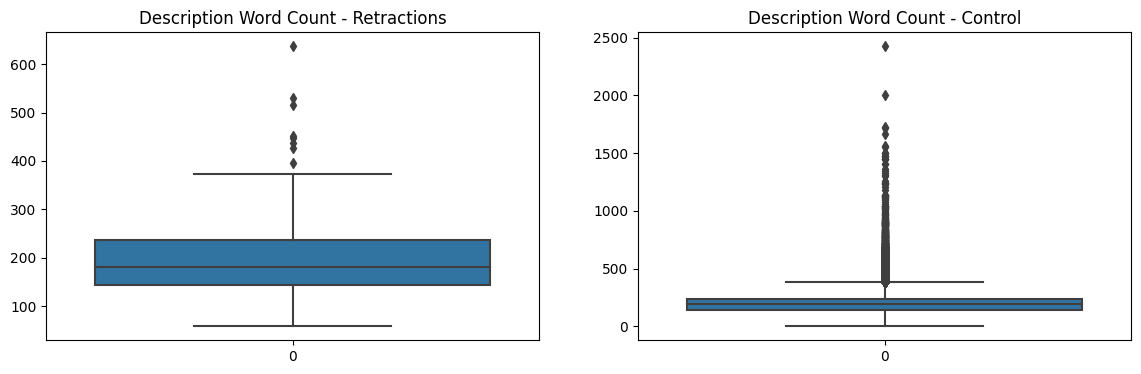

In [127]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

sns.boxplot(abstract_word_count_retractions, ax=axes[0]).set(title='Description Word Count - Retractions')
sns.boxplot(abstract_word_count_control, ax=axes[1]).set(title='Description Word Count - Control')

plt.show()

<div class="alert alert-block alert-info" style = "background:#d0de6f; color:#000000; border:0;">

# Chapter 2 - Citation Statistics <a class="anchor" id="chapter2"></a>